In [ ]:
# hide
# default_exp source
from nbdev.showdoc import *

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Source time functions
Splashy provides a variety of source time functions

## Gaussian
One of the most convenient source time functions is the gaussian with a defined dominant frequency.

$$
f(t) = -8f_0(t-t_0)*exp(-16f_0^2 (t - t_0)^2) \tag{1}
$$


In [ ]:
# export
def get_source_time(time, f0, t0=0):
    """Given a time vector return the source time function."""
    c1 = -8 * f0 * (time - t0)
    c2 = 16 * f0 **2
    c3 = -(time - t0) ** 2
    return c1 * np.exp(c2 * c3)

In [ ]:
dt = 0.001
f0 = 5
t0 = 1

time = np.arange(0, 2, step=dt)

f = get_source_time(time, f0=f0, t0=t0)
F = np.fft.rfft(f)
freq = np.fft.rfftfreq(len(f), dt)

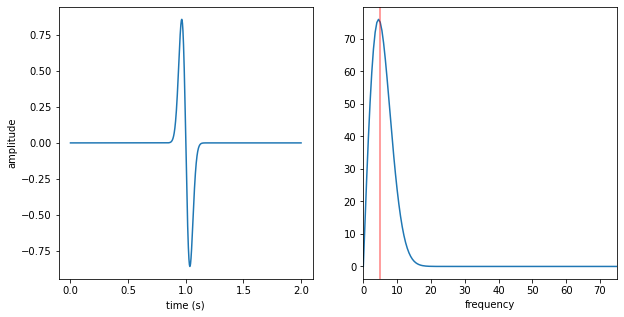

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax1, ax2 = fig.subplots(1,2)

# plot time domain of source
ax1.plot(time, f)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('amplitude')

ax2.plot(freq, abs(F))
ax2.set_xlabel('frequency')
ax2.set_xlim(0, f0 * 15)
ax2.axvline(f0, color='r', alpha=0.5)